Notebook with code for tackling the problem of DMRG 1 site vs. DMRG 2 site approximation of a MPS structure \
Analysis of computational complexity and how the different relevant parameters influence the scaling of the computation time

In [1]:
# import relevant depedencies
using TensorKit
using MPSKit
using Plots



First of all measure the influence L of the MPS to optimize using:\
R^20 => R^3     \
sigma = R^3 \
alg = DMRG1

┌ Warning: dmrg failed to converge 7.8284085166217e-11>1.0e-12
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 4.1139986414635293e-10>1.0e-12
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 7.80596005052251e-12>1.0e-12
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.2191012109822379e-11>1.0e-12
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 5.295176742155322e-11>1.0e-12
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 3.3411437839177605e-7>1.0e-12
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 7.426492614145934e-6>1.0e-12
└

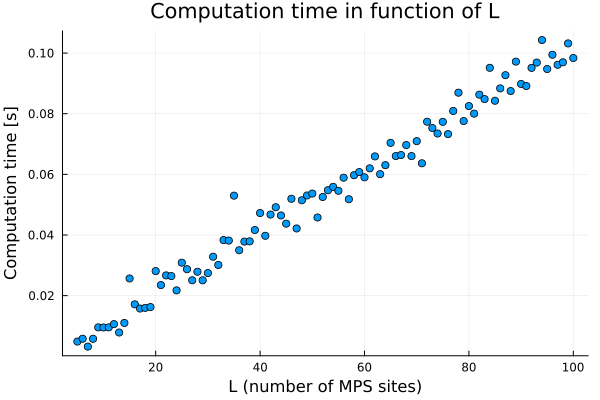

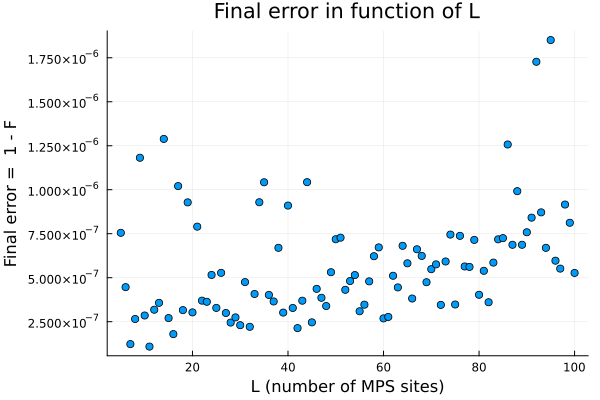

In [3]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
alg = DMRG(; verbose=true)                                                      # DMRG1 as approximation algorithm
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG(;  # Choose DMRG (1-site) for this example
    maxiter = 10,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)


physical_index = ℝ^3
max_virtualspace_exact = ℝ^25
max_virtualspace_approx = ℝ^3


time_taken_function_of_L = []
fidelity_in_function_of_L = []
L_list = collect(5:100)


for L in L_list

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_L, time_taken)
    error = 1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))
    push!(fidelity_in_function_of_L, error)

end


# Plot the results in function of L
display(scatter(L_list, time_taken_function_of_L, xlabel="L (number of MPS sites)", ylabel="Computation time [s]", title="Computation time in function of L", legend=false))
display(scatter(L_list, fidelity_in_function_of_L, xlabel="L (number of MPS sites)", ylabel="Final error =  1 - F", title="Final error in function of L", legend=false))



First of all measure the influence of the length of the MPS to optimize using:\
R^20 => R^3     \
sigma = R^3 \
alg = DMRG2

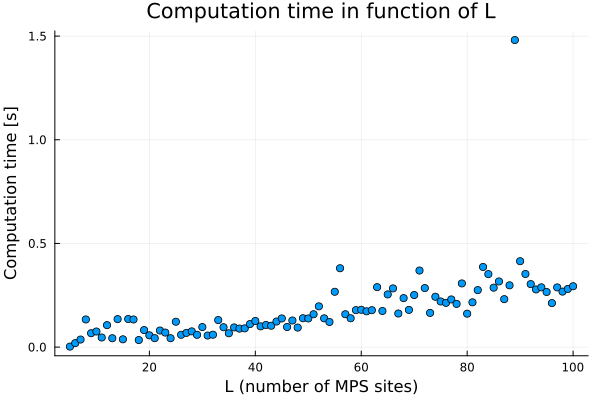

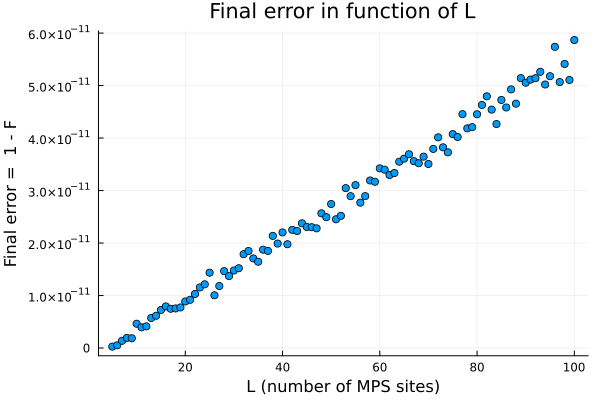

In [54]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
alg = DMRG(; verbose=true)                                                      # DMRG1 as approximation algorithm
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG2(;  # Choose DMRG (1-site) for this example
    maxiter = 10,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)




physical_index = ℝ^3
max_virtualspace_exact = ℝ^20
max_virtualspace_approx = ℝ^3


time_taken_function_of_L = []
fidelity_in_function_of_L = []
L_list = collect(5:100)


for L in L_list

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_L, time_taken)
    error = 1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))
    push!(fidelity_in_function_of_L, error)

end


# Plot the results in function of L
display(scatter(L_list, time_taken_function_of_L, xlabel="L (number of MPS sites)", ylabel="Computation time [s]", title="Computation time in function of L", legend=false))
display(scatter(L_list, fidelity_in_function_of_L, xlabel="L (number of MPS sites)", ylabel="Final error =  1 - F", title="Final error in function of L", legend=false))


Measure the influence chi_initial of the MPS to optimize using:\
R^chi_initial => R^3     \
sigma = R^3 \
alg = DMRG1

┌ Warning: dmrg failed to converge 3.220010074015068e-5>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 9.55778437388504e-6>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.1013045338037285e-9>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 2.3146683455707266e-5>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.9777372608945333e-5>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.6543179061109174e-6>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 3.4077777322867146e-6>1.0e-18
└ 

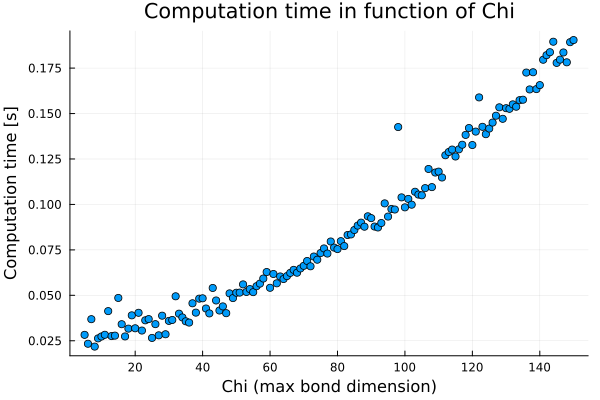

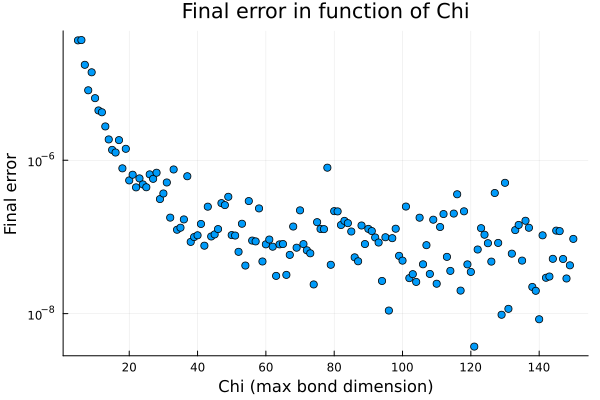

In [7]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG(;  # Choose DMRG (1-site) for this example
    tol = 1e-18,
    maxiter = 10,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)


time_taken_function_of_chi_initial = []
fidelity_in_function_of_chi_initial = []
chi_initial_list = collect(5:150)
L = 30

for chi_initial in chi_initial_list

    physical_index = ℝ^3
    max_virtualspace_exact = ℝ^chi_initial
    max_virtualspace_approx = ℝ^3

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_chi_initial, time_taken)
    error = 1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))
    push!(fidelity_in_function_of_chi_initial, error)

end


# Plot the results in function of L
display(scatter(chi_initial_list, time_taken_function_of_chi_initial, xlabel="Chi (max bond dimension)", ylabel="Computation time [s]", title="Computation time in function of Chi", legend=false))
display(scatter(chi_initial_list, fidelity_in_function_of_chi_initial, xlabel="Chi (max bond dimension)", ylabel="Final error", title="Final error in function of Chi", legend=false, yscale=:log10))





Measure the influence chi_initial of the MPS to optimize using:\
R^chi_initial => R^3     \
sigma = R^3 \
alg = DMRG2

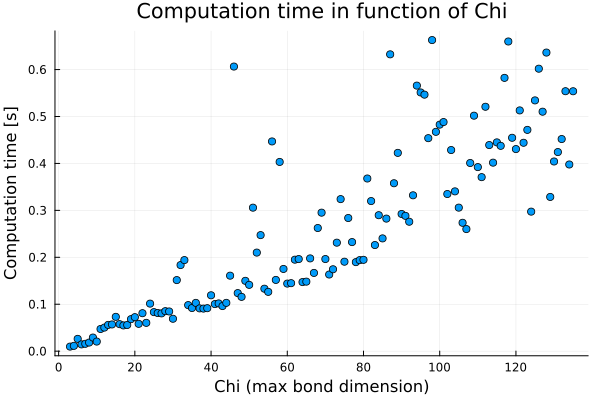

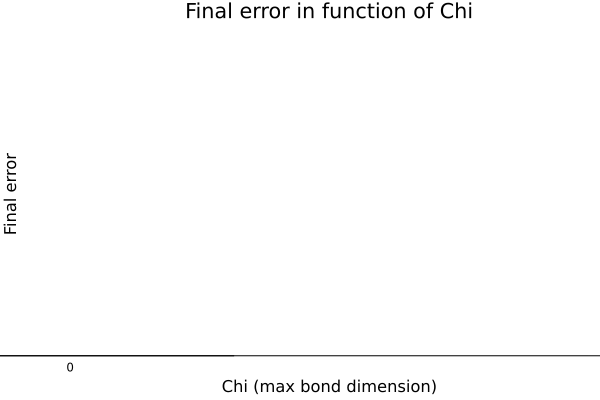

┌ Warning: No strict ticks found
└ @ PlotUtils /home/bart/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/bart/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: Invalid negative or zero value 0.0 found at series index 7 for log10 based yscale
└ @ Plots /home/bart/.julia/packages/Plots/sxUvK/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /home/bart/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/bart/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: Invalid negative or zero value 0.0 found at series index 7 for log10 based yscale
└ @ Plots /home/bart/.julia/packages/Plots/sxUvK/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /home/bart/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/bart/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ Plo

In [56]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG2(;  # Choose DMRG (1-site) for this example
    maxiter = 10,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)

ph_dim = 3
time_taken_function_of_chi_initial = []
fidelity_in_function_of_chi_initial = []
L = 30
maxchi = Int(ph_dim*floor(L/2))
chi_initial_list = collect(3:3*maxchi)

for chi_initial in chi_initial_list

    physical_index = ℝ^3
    max_virtualspace_exact = ℝ^chi_initial
    max_virtualspace_approx = ℝ^3

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_chi_initial, time_taken)
    error = abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact)))
    push!(fidelity_in_function_of_chi_initial, error)

end


# Plot the results in function of L
display(scatter(chi_initial_list, time_taken_function_of_chi_initial, xlabel="Chi (max bond dimension)", ylabel="Computation time [s]", title="Computation time in function of Chi", legend=false))
display(scatter(chi_initial_list, fidelity_in_function_of_chi_initial, xlabel="Chi (max bond dimension)", ylabel="Final error", title="Final error in function of Chi", legend=false, yscale=:log10))





Analyse the influence of the number of sweeps of the variatational algorithm on the fidelity of the obtained approximation.
Compare the performance of DMRG1 vs. DMRG2 in a normalized plot -> eg. everything the same but plot fidelity DMRG2/DMRG1 => How much better does DMRG2 behave compared to DMRG1?

Analysis 1: Computation time and fidelity of DMRG1 in function of number of sweeps

1
2


┌ Warning: dmrg failed to converge 1.3623878594005558>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 7.421983446302742e-5>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


3
4
5


┌ Warning: dmrg failed to converge 2.928090114382311e-5>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.631572712762431e-5>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


6
7


┌ Warning: dmrg failed to converge 1.5570925665623117e-5>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 7.97895188902845e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


8
9


┌ Warning: dmrg failed to converge 3.017969047012649e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 2.11164654273759e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


10
11


┌ Warning: dmrg failed to converge 2.2552699715079706e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 2.4928301325246443e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


12


┌ Warning: dmrg failed to converge 2.8369898820847525e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 3.269471931614508e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


13
14


┌ Warning: dmrg failed to converge 3.678372388085541e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


15


┌ Warning: dmrg failed to converge 3.7878858959760513e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


16


┌ Warning: dmrg failed to converge 3.293453834263862e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


17


┌ Warning: dmrg failed to converge 2.7154573580439256e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


18


┌ Warning: dmrg failed to converge 1.9042269060295855e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


19


┌ Warning: dmrg failed to converge 1.1747736936108405e-6>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


20


┌ Warning: dmrg failed to converge 6.72431180475645e-7>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


21


┌ Warning: dmrg failed to converge 3.693134212617128e-7>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


22


┌ Warning: dmrg failed to converge 1.9818481490351634e-7>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


23


┌ Warning: dmrg failed to converge 1.0492998173438777e-7>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


24


┌ Warning: dmrg failed to converge 5.511238328019425e-8>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


25


┌ Warning: dmrg failed to converge 2.8807028520262866e-8>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


26


┌ Warning: dmrg failed to converge 1.5013153334102868e-8>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


27


┌ Warning: dmrg failed to converge 7.81032119153648e-9>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


28


┌ Warning: dmrg failed to converge 4.058760650904214e-9>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


29


┌ Warning: dmrg failed to converge 2.107807577247094e-9>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


30


┌ Warning: dmrg failed to converge 1.0941942253726294e-9>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 5.678747065329027e-10>1.0e-24
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78


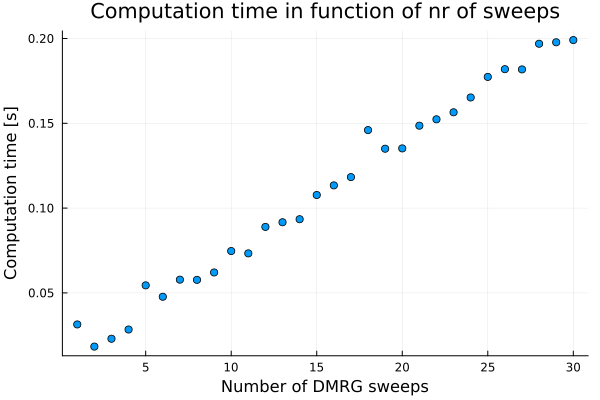

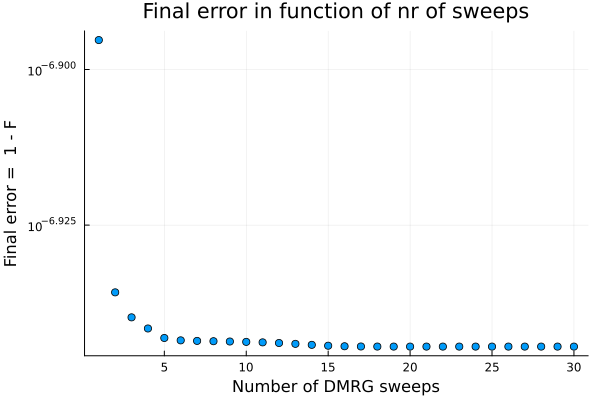

In [10]:
# Fidelity in function of number of sweeps for DMRG1


physical_index = ℝ^3
max_virtualspace_exact = ℝ^50
max_virtualspace_approx = ℝ^3


time_taken_function_of_sweep = []
fidelity_in_function_of_sweep = []
L = 50
max_iter_list = [j for j in 1:30]

Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)



for iter in max_iter_list
    println(iter)
    alg = DMRG(;  # Choose DMRG (1-site) for this example
        tol = 1e-24,
        maxiter = iter,  # Maximum number of iterations
        verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
    
        )
    


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_sweep, time_taken)
    error = abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact)))
    push!(fidelity_in_function_of_sweep, error)

end


# Plot the results in function of L
display(scatter(max_iter_list, time_taken_function_of_sweep, xlabel="Number of DMRG sweeps", ylabel="Computation time [s]", title="Computation time in function of nr of sweeps", legend=false))
display(scatter(max_iter_list, fidelity_in_function_of_sweep, xlabel="Number of DMRG sweeps", ylabel="Final error =  1 - F", title="Final error in function of nr of sweeps", legend=false, yscale=:log10))



Analysis 2: Computation time and fidelity of DMRG2 in function of number of sweeps

1


┌ Warning: scalartype(data) = ComplexF64 ⊈ ℝ)
└ @ TensorKit /home/bart/.julia/packages/TensorKit/dYeTH/src/tensors/tensor.jl:33
┌ Warning: 2site dmrg failed to converge 0.7346587416774101>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


2
3


┌ Warning: 2site dmrg failed to converge 9.855027835005e-7>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


4


┌ Warning: 2site dmrg failed to converge 2.9988599552644145e-10>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


5


┌ Warning: 2site dmrg failed to converge 3.4266469312514286e-13>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


6


┌ Warning: 2site dmrg failed to converge 7.913291665583979e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


7


┌ Warning: 2site dmrg failed to converge 7.957751738927418e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


8


┌ Warning: 2site dmrg failed to converge 8.037662369951783e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


9


┌ Warning: 2site dmrg failed to converge 8.070278861883509e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


10


┌ Warning: 2site dmrg failed to converge 7.87288545626228e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


11


┌ Warning: 2site dmrg failed to converge 7.858927173428646e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


12


┌ Warning: 2site dmrg failed to converge 7.650999252822438e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


13


┌ Warning: 2site dmrg failed to converge 7.842580402155113e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


14


┌ Warning: 2site dmrg failed to converge 7.708246376715987e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


15


┌ Warning: 2site dmrg failed to converge 7.965228951124479e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


16


┌ Warning: 2site dmrg failed to converge 8.10692252427859e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


17


┌ Warning: 2site dmrg failed to converge 7.649376834593988e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


18


┌ Warning: 2site dmrg failed to converge 7.85150162507184e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


19


┌ Warning: 2site dmrg failed to converge 7.836084817935397e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


20


┌ Warning: 2site dmrg failed to converge 8.081650521007629e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


21


┌ Warning: 2site dmrg failed to converge 8.095100107905983e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


22


┌ Warning: 2site dmrg failed to converge 7.817706588903573e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


23


┌ Warning: 2site dmrg failed to converge 7.86261095318133e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


24


┌ Warning: 2site dmrg failed to converge 7.977467828540252e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


25


┌ Warning: 2site dmrg failed to converge 7.928024988344297e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


26


┌ Warning: 2site dmrg failed to converge 8.07623829020705e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


27


┌ Warning: 2site dmrg failed to converge 7.877615051575938e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


28


┌ Warning: 2site dmrg failed to converge 7.762998802112414e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


29


┌ Warning: 2site dmrg failed to converge 7.864871829885392e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


30


┌ Warning: 2site dmrg failed to converge 8.313981027259963e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 8.011677343509348e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45


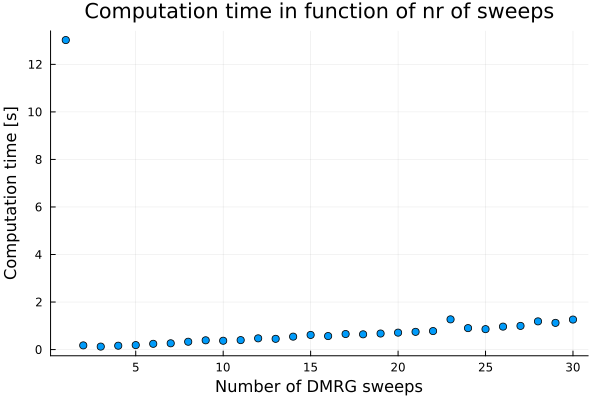

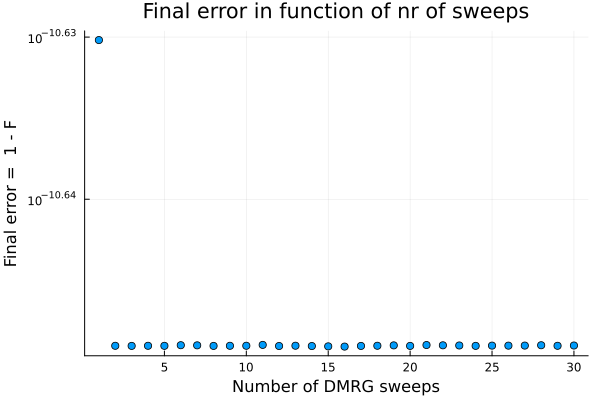

In [2]:
# Fidelity in function of number of sweeps for DMRG1


physical_index = ℝ^3
max_virtualspace_exact = ℝ^50
max_virtualspace_approx = ℝ^3


time_taken_function_of_sweep = []
fidelity_in_function_of_sweep = []
L = 50
max_iter_list = [j for j in 1:30]

Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)



for iter in max_iter_list
    println(iter)
    alg = DMRG2(;  # Choose DMRG (1-site) for this example
        tol = 1e-18,
        maxiter = iter,  # Maximum number of iterations
        verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
    
        )
    


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_sweep, time_taken)
    error = abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact)))
    push!(fidelity_in_function_of_sweep, error)

end


# Plot the results in function of L
display(scatter(max_iter_list, time_taken_function_of_sweep, xlabel="Number of DMRG sweeps", ylabel="Computation time [s]", title="Computation time in function of nr of sweeps", legend=false))
display(scatter(max_iter_list, fidelity_in_function_of_sweep, xlabel="Number of DMRG sweeps", ylabel="Final error =  1 - F", title="Final error in function of nr of sweeps", legend=false, yscale=:log10))



Analysis of the computational time and error in function of the chi_approx:
difference between DMRG1 and DMRG2?

DMRG1

┌ Warning: dmrg failed to converge 2.773133477552888e-10>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 7.04424071324281e-8>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 6.072105022489072e-8>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 8.331969428657369e-8>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 2.693394122269902e-7>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.2314483128187545e-8>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 2.587730921425517e-12>1.0e-18
└ @ 

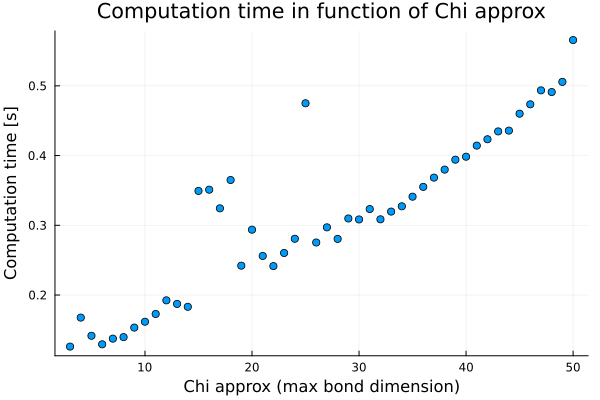

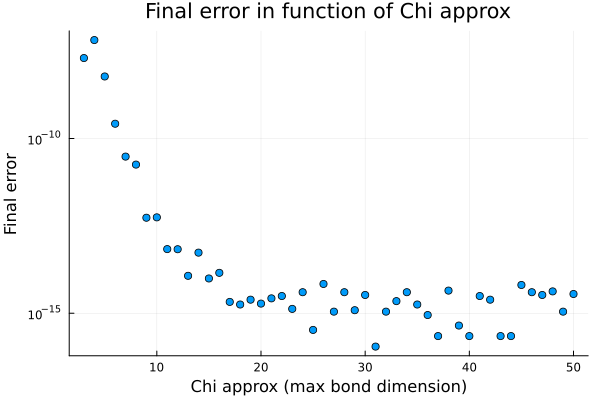

In [12]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG(;  # Choose DMRG (1-site) for this example
    tol = 1e-18,
    maxiter = 10,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)


time_taken_function_of_chi_approx = []
fidelity_in_function_of_chi_approx = []
chi_initial = 100
chi_approx_list = collect(3:50)
L = 30

for chi_approx in chi_approx_list

    physical_index = ℝ^3
    max_virtualspace_exact = ℝ^chi_initial
    max_virtualspace_approx = ℝ^Int(chi_approx)

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_chi_approx, time_taken)
    error = max(abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))), 1e-18)
    push!(fidelity_in_function_of_chi_approx, error)

end


# Plot the results in function of L
display(scatter(chi_approx_list, time_taken_function_of_chi_approx, xlabel="Chi approx (max bond dimension)", ylabel="Computation time [s]", title="Computation time in function of Chi approx", legend=false))
display(scatter(chi_approx_list, fidelity_in_function_of_chi_approx, xlabel="Chi approx (max bond dimension)", ylabel="Final error", title="Final error in function of Chi approx", legend=false, yscale=:log10))





DMRG2

┌ Warning: 2site dmrg failed to converge 7.885134343727376e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 1.1210935690377404e-14>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 8.258803768583193e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 8.264765022932587e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 9.195217063523161e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 5.651642039486456e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg faile

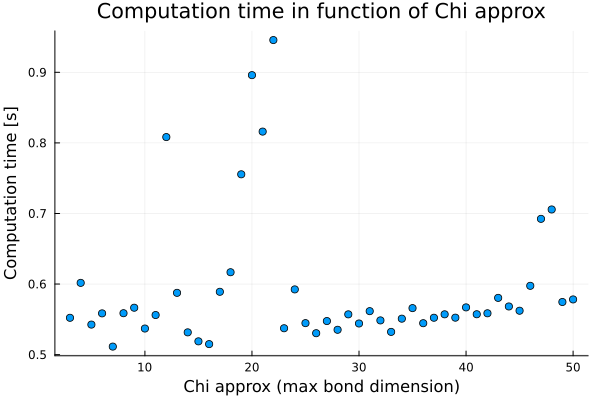

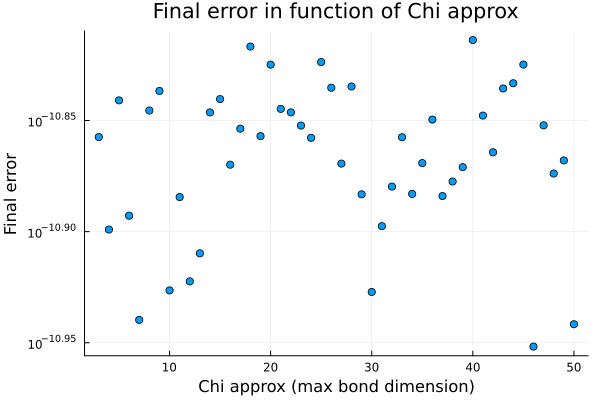

In [13]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG2(;  # Choose DMRG (1-site) for this example
    tol = 1e-18,
    maxiter = 10,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)


time_taken_function_of_chi_approx = []
fidelity_in_function_of_chi_approx = []
chi_initial = 100
chi_approx_list = collect(3:50)
L = 30

for chi_approx in chi_approx_list

    physical_index = ℝ^3
    max_virtualspace_exact = ℝ^chi_initial
    max_virtualspace_approx = ℝ^Int(chi_approx)

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_chi_approx, time_taken)
    error = max(abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))), 1e-18)
    push!(fidelity_in_function_of_chi_approx, error)

end


# Plot the results in function of L
display(scatter(chi_approx_list, time_taken_function_of_chi_approx, xlabel="Chi approx (max bond dimension)", ylabel="Computation time [s]", title="Computation time in function of Chi approx", legend=false))
display(scatter(chi_approx_list, fidelity_in_function_of_chi_approx, xlabel="Chi approx (max bond dimension)", ylabel="Final error", title="Final error in function of Chi approx", legend=false, yscale=:log10))





Scaling in function of the physical dimension inside of the MPS structure for the case where the bond dimensions are kept constant.

┌ Warning: dmrg failed to converge 1.5662278470062967e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 2.2503128329523607e-11>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 7.656890892017469e-11>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.415514925212316e-9>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 9.994647150423482e-8>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 4.89075857672341e-8>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:78
┌ Warning: dmrg failed to converge 1.7634698729275745e-8>1.0e-18
└

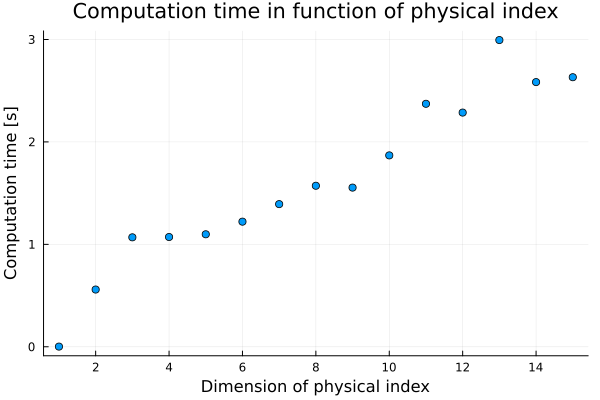

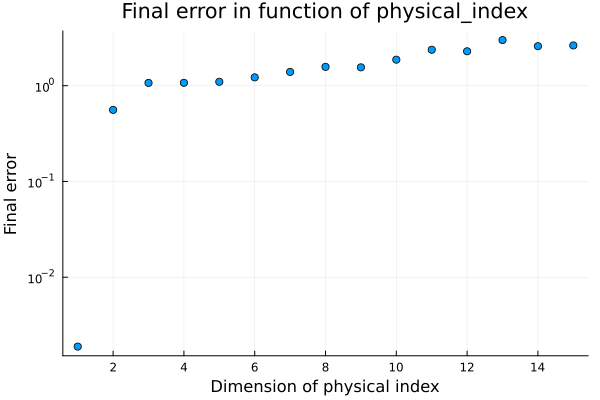

In [13]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG(;  # Choose DMRG (1-site) for this example
    tol = 1e-18,
    maxiter = 40,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)


time_taken_function_of_ph_i = []
fidelity_in_function_of_ph_i = []
chi_initial = 100
chi_approx = 15
ph_list = [i for i in 1:15]
L = 30

for physical_index in ph_list

    physical_index = ℝ^Int(physical_index)
    max_virtualspace_exact = ℝ^chi_initial
    max_virtualspace_approx = ℝ^Int(chi_approx)

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_ph_i, time_taken)
    error = max(abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))), 1e-18)
    push!(fidelity_in_function_of_ph_i, error)

end


# Plot the results in function of L
display(scatter(ph_list, time_taken_function_of_ph_i, xlabel="Dimension of physical index", ylabel="Computation time [s]", title="Computation time in function of physical index", legend=false))
display(scatter(ph_list, time_taken_function_of_ph_i, xlabel="Dimension of physical index", ylabel="Final error", title="Final error in function of physical_index", legend=false, yscale=:log10))





┌ Warning: 2site dmrg failed to converge 6.515478031832876e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 1.19750586673858e-14>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 1.0210379537974866e-14>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 6.776037801122994e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 7.276445793949474e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg failed to converge 5.9517046962883045e-15>1.0e-18
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:45
┌ Warning: 2site dmrg faile

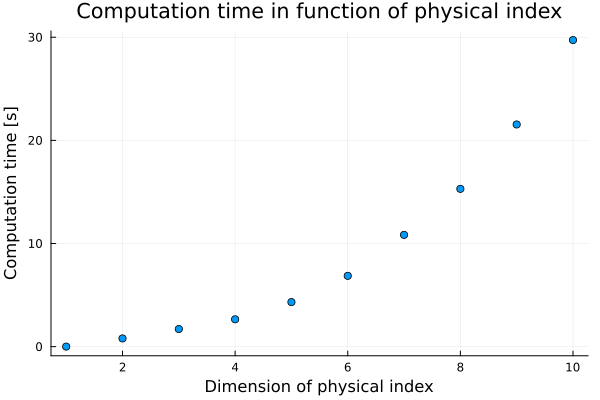

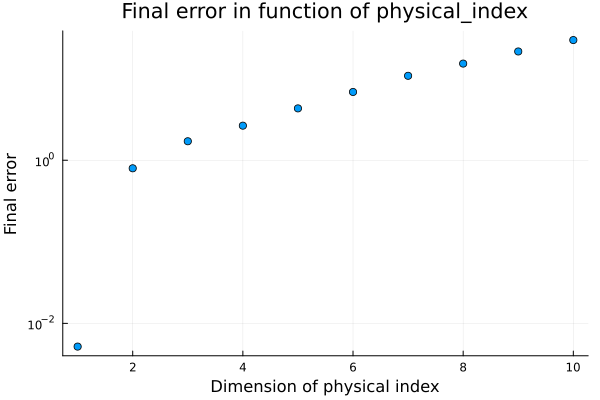

In [3]:
# analysis in terms of the length of the MPS
# initialize random tensor maps with the correct sizes for the approximated MPS 
# case1 - truncate a uniform MPS of chi = 20 to one of chi = 5
# random initializion
# CONTROL THE DMRG PARAMETERS?
# Create a DMRG algorithm instance
alg = DMRG2(;  # Choose DMRG (1-site) for this example
    tol = 1e-18,
    maxiter = 40,  # Maximum number of iterations
    verbose = false   # Verbosity level (0: silent, 1: basic, 2: detailed)
)


time_taken_function_of_ph_i = []
fidelity_in_function_of_ph_i = []
chi_initial = 100
chi_approx = 15
ph_list = [i for i in 1:10]
L = 30

for physical_index in ph_list

    physical_index = ℝ^Int(physical_index)
    max_virtualspace_exact = ℝ^chi_initial
    max_virtualspace_approx = ℝ^Int(chi_approx)

    Ψ_exact = FiniteMPS(                                                        # Generate a random initial state with large bond dimension
        rand, 
        Float64, 
        L, 
        physical_index, 
        max_virtualspace_exact)

    Ψ_approx = FiniteMPS(                                                       # Generate a random state used for approximation 
        rand,                                                                   # with a smaller bond dimension
        Float64, 
        L, physical_index, 
        max_virtualspace_approx)


    I_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(Ψ_exact)), physicalspace(Ψ_exact, i))) for i in 1:length(Ψ_exact)]) # corresponding identity operator as an MPO

    time_taken = @elapsed begin                                                 # time how long it takes to compute the approximation
        Ψ_new, = approximate(Ψ_approx, (I_MPO, Ψ_exact), alg)
    end

    push!(time_taken_function_of_ph_i, time_taken)
    error = max(abs(1-dot(Ψ_new, Ψ_exact)^2/(dot(Ψ_new, Ψ_new)*dot(Ψ_exact, Ψ_exact))), 1e-18)
    push!(fidelity_in_function_of_ph_i, error)

end


# Plot the results in function of L
display(scatter(ph_list, time_taken_function_of_ph_i, xlabel="Dimension of physical index", ylabel="Computation time [s]", title="Computation time in function of physical index", legend=false))
display(scatter(ph_list, time_taken_function_of_ph_i, xlabel="Dimension of physical index", ylabel="Final error", title="Final error in function of physical_index", legend=false, yscale=:log10))



